## About

This plot is a [bubble map](/bubble-map). It shows the cities of the USA where you can saw **solar eclipses**, and the duration of the eclipse.

The chart was made by [Joseph B.](https://www.barbierjoseph.com/). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![bubble map](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-map-usa-with-scatter-plot-on-top.png?raw=true)


## Libraries

First, you need to install the following librairies:

- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- [pandas](https://python-graph-gallery.com/pandas/) and `geopandas` are used to put the data into a dataframe and manipulate geographical data
- `geopandas`: for the geographical data
- `highlight_text`: to add beautiful annotations to the chart

And that's it!


In [1]:
# plot
import matplotlib.pyplot as plt
from highlight_text import fig_text, ax_text

# data
import pandas as pd
import geopandas as gpd

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://github.com/holtzy/The-Python-Graph-Gallery). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

The dataset contains **one row per city** where the eclipe was visible (with **latitude** and **longitude**) and the time at which the eclipse was at its minimum and maximum.


In [2]:
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/eclipse_annular_2023.csv"
df_2023 = pd.read_csv(url)

url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/eclipse_total_2024.csv"
df_2024 = pd.read_csv(url)

First we create a `color` column in the dataset:


In [3]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

norm = Normalize(vmin=df_2023['duration'].min(), vmax=df_2023['duration'].max())
cmap2023 = plt.get_cmap('summer')
cmap2024 = plt.get_cmap('autumn')
sm2023 = ScalarMappable(norm=norm, cmap=cmap2023)
sm2024 = ScalarMappable(norm=norm, cmap=cmap2024)
df_2023['color'] = df_2023['duration'].apply(lambda x: sm2023.to_rgba(x))
df_2024['color'] = df_2024['duration'].apply(lambda x: sm2024.to_rgba(x))

For the end of this post, we also compute the **duration of the eclipse** in each city and **sort the cities by duration** to highlight the cities where the eclipse was the longest:


In [4]:
combined_df = pd.merge(
    df_2023[['name', 'duration', 'lat', 'lon']],
    df_2024[['name', 'duration', 'lat', 'lon']],
    on='name', suffixes=('_2023', '_2024')
)
combined_df['Total_duration'] = combined_df['duration_2023'] + combined_df['duration_2024']

# Find the top 10 names by total duration
combined_df.sort_values('Total_duration', ascending=False, inplace=True)
combined_df.head()

,name,duration_2023,lat_2023,lon_2023,duration_2024,lat_2024,lon_2024,Total_duration
186,Utopia,4.850000,29.624088,-99.512655,4.383333,29.624088,-99.512655,9.233333
151,Leakey,4.750000,29.725358,-99.763098,4.433333,29.725358,-99.763098,9.183333
24,Edgewood,4.616667,35.131319,-106.220161,4.266667,32.690760,-95.882221,8.883333
164,Midland,4.766667,32.024642,-102.113467,3.950000,39.118047,-87.189998,8.716667
91,Bandera,4.583333,29.725126,-99.074261,4.116667,29.725126,-99.074261,8.700000


## Get map positions

We need to find a way to get actual country shape to put in our plot. For this we need to load a mapping dataset that you can get at [Natural Earth Data](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/) (`Download countries` button). Then unzip it and load it with the following code:


In [5]:
# world data (Replace with your path)
world = gpd.read_file(
    "../../static/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
)

# filter on USA
us = world[world['CONTINENT'] == 'North America']
usa = us[us['NAME'] == 'United States of America']

Once we get that file, we need to merge it with our actual dataset:


## Background map

Thanks to the `geopandas` library, we can easily add a **background map** to our plot. We just need to call the `plot()` function on our `geo dataframe`.

With just a few lines of code, we can create a **syntetic map** that shows a US map.


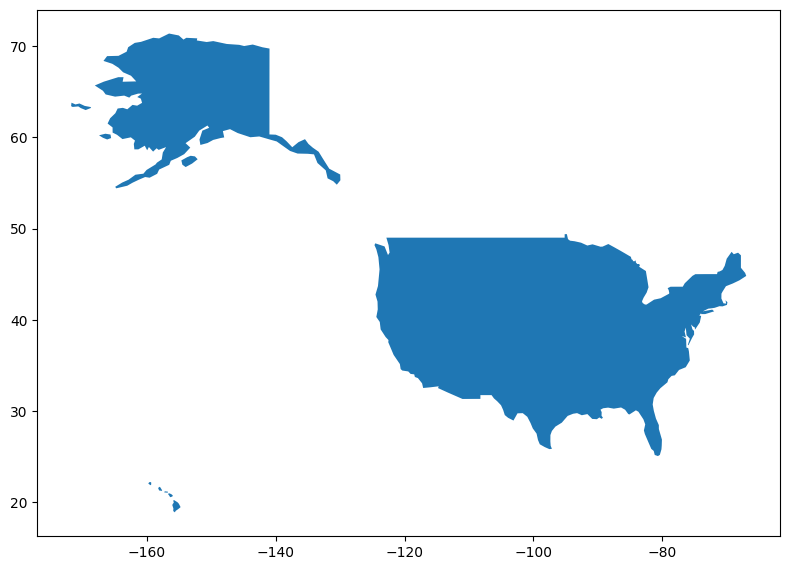

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
usa.plot(ax=ax)

plt.tight_layout()
plt.show()

## Custom the axis

When we create map, we are generally **not interested in the axis** because the map itself contains all the information. For this, we use the `axis('off')` function to remove the axis.

We start by customizing the x and y axis limits to focus on the area of interest: where the eclipses were visible. We use the `xlim()` and `ylim()` functions to do this.


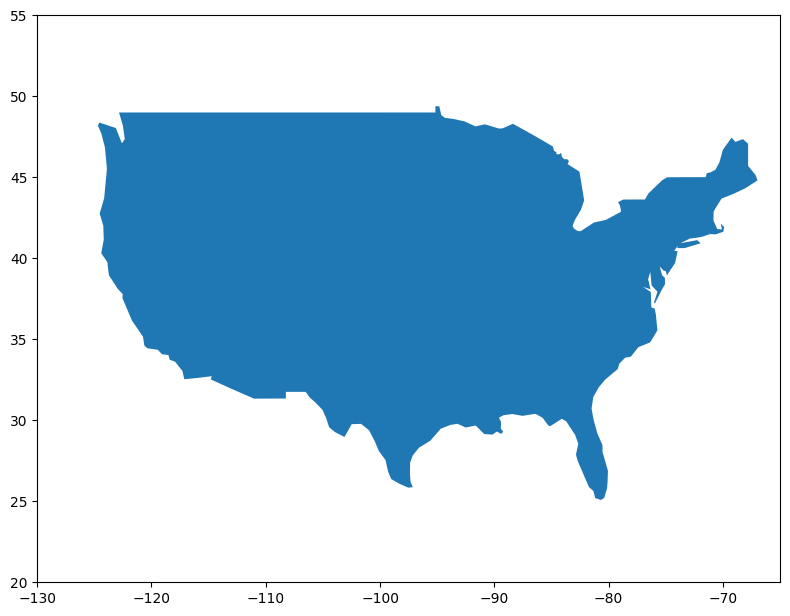

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
usa.plot(ax=ax)

# custom axis
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)

# display the plot
plt.tight_layout()
plt.show()

## Add scatter plots

Now that we have our map, we can add the **scatter plots**. We use the `scatter()` function to do this.

We can customize the **size** and **color** of the points to make them more visible.


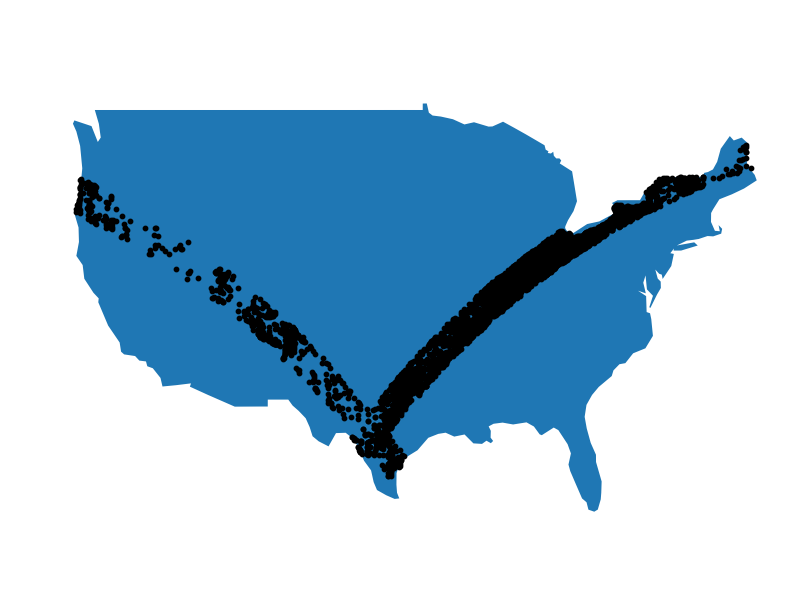

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

# background map
usa.plot(ax=ax)

# plot eclipses
for i,df in enumerate([df_2023, df_2024]):
    ax.scatter(
        df['lon'],
        df['lat'],
        color='black',
        s=10
    )

# custom axis to focus on USA
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
ax.axis('off')

# display the plot
plt.tight_layout()
plt.show()

## Custom other colors

Colors is part of the most important part of a plot. Here we define lots of colors to make the plot more **readable** and **beautiful**.

Concretly, here is what we change:

- **edgecolor** of the map and individual data points
- **background color** of the plot
- **color** of the data points _according to the duration of the eclipse_


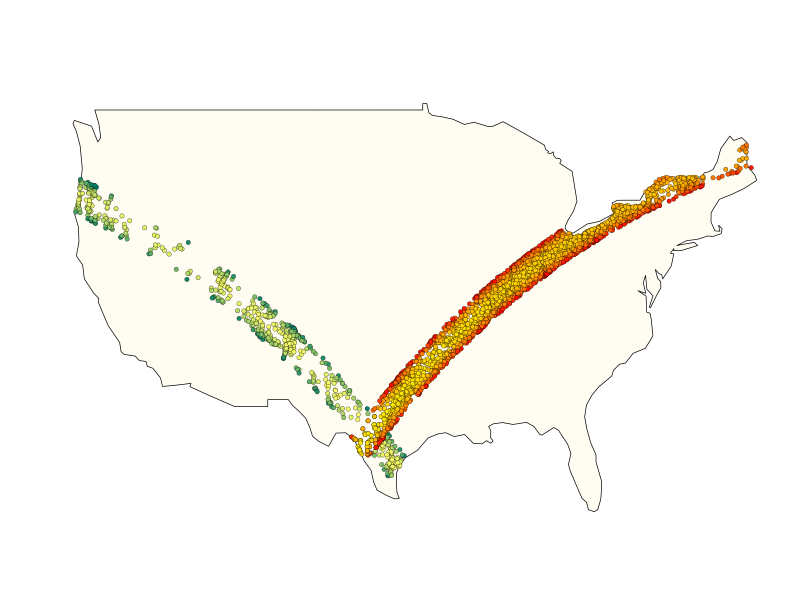

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

# background map
usa.plot(ax=ax, edgecolor='black', color='#fffcf2', linewidth=0.5)

# plot eclipses
colors = ['#e09f3e', '#9e2a2b']
for i,df in enumerate([df_2023, df_2024]):
    ax.scatter(
        df['lon'], df['lat'], # coordinates
        c=df['color'], edgecolor='black', # colors
        s=10, linewidth=0.2, # size and edge width
    )

# custom axis to focus on USA
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
ax.axis('off')

# display the plot
plt.tight_layout()
plt.show()

It's already looking better


## Annotations

Annotations is probably the **most important part** of nice visualizations! Unfortunately, it's also a part that takes a lot of time and code 😅.

### Add a title

The title is added with the `text()` function and not the `title()` function because it gives us **more customization options**.

### Add a credit

For the credit, we need the `highlight_text` package that makes way easier customizing annotations! We use the `fig_text()` function, which is similar to `fig.text()` but with **more customization options**.

### Add arrows

We will create a custom arrow in Matplotlib by defining its style, size, and color, and then positions it on the figure using specified **tail and head coordinates**. It uses a `FancyArrowPatch` for flexible styling, including an **arc connection style**, and adds this arrow to the current plot's axes. This approach allows for detailed customization and highlighting within visual presentations, making it ideal for annotating or **drawing attention** to specific areas of a plot.


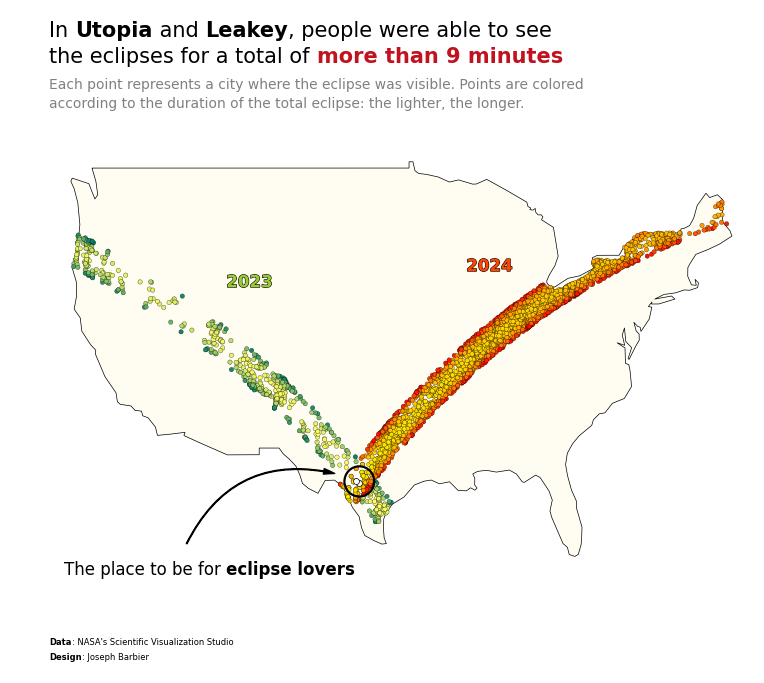

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))

# background map
usa.plot(ax=ax, edgecolor='black', color='#fffcf2', linewidth=0.5)

# plot eclipses
colors = ['#e09f3e', '#9e2a2b']
for i,df in enumerate([df_2023, df_2024]):
    ax.scatter(
        df['lon'], df['lat'], # coordinates
        color=df['color'], edgecolor='black', # colors
        s=10, linewidth=0.2, # size and edge width
    )

# custom axis to focus on USA
ax.set_xlim(-130, -65)
ax.set_ylim(20, 55)
ax.axis('off')

# title
top_minutes = combined_df['Total_duration'].iloc[0]
top_city1 = combined_df['name'].iloc[0]
top_city2 = combined_df['name'].iloc[1]
text = f"""
In <{top_city1}> and <{top_city2}>, people were able to see
the eclipses for a total of <more than {top_minutes:.0f} minutes>

<Each point represents a city where the eclipse was visible. Points are colored>
<according to the duration of the total eclipse: the lighter, the longer.>
"""
fig_text(
    0.1, 0.85, text,
    ha='left', va='center',
    fontsize=15,
    color='black',
    highlight_textprops=[
        {"fontweight": 'bold'},
        {"fontweight": 'bold'},
        {"color": '#c1121f', "fontweight": 'bold'},
        {"color": "grey", "fontsize": 10},
        {"color": "grey", "fontsize": 10}
    ]
)

# highlight the top cities
years = ['2023', '2024']
for i in range(2):
    city = combined_df['name'].iloc[i]
    ax.scatter(
        combined_df['lon_'+years[i]].iloc[i],
        combined_df['lat_'+years[i]].iloc[i],
        color='white',
        edgecolor='black',
        linewidth=.5,
        s=18,
        zorder=10
    )

# circle around the top city
from matplotlib.patches import Ellipse
def add_ellipse(ax, xy, radius=1.3, color='black', lw=1.6, scale_ratio=1.1):
    ellipse = Ellipse(xy, width=radius*2, height=radius*1.3*scale_ratio, edgecolor=color, fill=False, lw=lw)
    ax.add_patch(ellipse)
add_ellipse(ax, (-99.5, 29.7))

# arrow
from matplotlib.patches import FancyArrowPatch
def draw_arrow(tail_position, head_position, invert=False):
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color="k")
    if invert:
        connectionstyle = "arc3,rad=-.4"
    else:
        connectionstyle = "arc3,rad=.4"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)
draw_arrow((0.27, 0.25), (0.46, 0.34), invert=True)

# annotations THE PLACE TO BE
text = "The place to be for <eclipse lovers>"
fig_text(
    0.3, 0.22,
    text,
    ha='center', va='center',
    fontsize=12,
    color='black',
    highlight_textprops=[
        {"fontweight": 'bold'}
    ]
)

# 2023 and 2024 annotations
import matplotlib.patheffects as path_effects
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]
pe = path_effect_stroke(linewidth=0.8, foreground="black")

text = "<2023>"
font_prop = {"color": 'yellowgreen', "path_effects": pe, "weight": 'bold'}
fig_text(
    0.35, 0.58,
    text,
    ha='center', va='center',
    fontsize=12,
    highlight_textprops=[font_prop]
)

text = "<2024>"
font_prop = {"color": 'orangered', "path_effects": pe, "weight": 'bold'}
fig_text(
    0.65, 0.6,
    text,
    ha='center', va='center',
    fontsize=12,
    highlight_textprops=[font_prop]
)

# credit
text = """
<Data>: NASA's Scientific Visualization Studio
<Design>: Joseph Barbier
"""
fig_text(
    0.1, 0.12,
    text,
    ha='left', va='center',
    fontsize=6,
    color='black',
    highlight_textprops=[
        {"fontweight": "bold"},
        {"fontweight": "bold"}
    ]
)

# display the plot
plt.tight_layout()
fig.savefig("../../static/graph/web-map-usa-with-scatter-plot-on-top.png", dpi=300, bbox_inches='tight')
plt.show()

## Going further

This article explains how to reproduce a [map with scatter plot](/bubble-map) with annotations, colormap and nice features.

For more examples of **advanced customization** in map, check out [choropleth map of America](https://python-graph-gallery.com/choropleth-map-geopandas-python/). Also, you might be interested in [creating interactive map](https://python-graph-gallery.com/292-choropleth-map-with-folium/) with Folium.
